#### Select a dataset (e.g., COVID-19 statistics, stock market data). Perform exploratory data  analysis  using  Pandas  and  NumPy.  Generate  descriptive  statistics,  visualize trends, and summarize insights

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
# Cell 2: Load Dataset
# Using Johns Hopkins University COVID-19 dataset
url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"

df = pd.read_csv(url)
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (161568, 5)

First few rows:


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [10]:
# Cell 3: Initial Data Exploration
print("Dataset Information:")
print("="*50)
df.info()

print("\n\nColumn Names:")
print(df.columns.tolist())

print("\n\nData Types:")
print(df.dtypes)

print("\n\nMissing Values:")
print(df.isnull().sum())

print("\n\nUnique Countries:")
print(f"Total: {df['Country'].nunique()}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


Column Names:
['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']


Data Types:
Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object


Missing Values:
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


Unique Countries:
Total: 198


In [11]:
# Cell 4: Data Preprocessing
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by country and date
df = df.sort_values(['Country', 'Date'])

# Create additional features
df['New_Confirmed'] = df.groupby('Country')['Confirmed'].diff().fillna(0)
df['New_Deaths'] = df.groupby('Country')['Deaths'].diff().fillna(0)
df['New_Recovered'] = df.groupby('Country')['Recovered'].diff().fillna(0)

# Handle negative values (data corrections)
df['New_Confirmed'] = df['New_Confirmed'].clip(lower=0)
df['New_Deaths'] = df['New_Deaths'].clip(lower=0)
df['New_Recovered'] = df['New_Recovered'].clip(lower=0)

# Calculate mortality and recovery rates
df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed'] * 100).fillna(0)
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'] * 100).fillna(0)

print("Data preprocessing completed!")
print(f"New shape: {df.shape}")
df.head(10)

Data preprocessing completed!
New shape: (161568, 10)


,Date,Country,Confirmed,Recovered,Deaths,New_Confirmed,New_Deaths,New_Recovered,Mortality_Rate,Recovery_Rate
0,2020-01-22,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
5,2020-01-27,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
6,2020-01-28,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
7,2020-01-29,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
8,2020-01-30,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0
9,2020-01-31,Afghanistan,0,0,0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Cell 5: Descriptive Statistics - Overall
print("DESCRIPTIVE STATISTICS")
print("="*70)
print("\nBasic Statistics:")
print(df[['Confirmed', 'Deaths', 'Recovered', 'Mortality_Rate', 'Recovery_Rate']].describe())

print("\n\nLatest Global Statistics:")
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

print(f"Date: {latest_date.date()}")
print(f"Total Confirmed Cases: {latest_data['Confirmed'].sum():,.0f}")
print(f"Total Deaths: {latest_data['Deaths'].sum():,.0f}")
print(f"Total Recovered: {latest_data['Recovered'].sum():,.0f}")
print(f"Global Mortality Rate: {(latest_data['Deaths'].sum() / latest_data['Confirmed'].sum() * 100):.2f}%")
print(f"Global Recovery Rate: {(latest_data['Recovered'].sum() / latest_data['Confirmed'].sum() * 100):.2f}%")



DESCRIPTIVE STATISTICS

Basic Statistics:
          Confirmed         Deaths     Recovered  Mortality_Rate  \
count  1.615680e+05  161568.000000  1.615680e+05    1.615680e+05   
mean   7.361569e+05   13999.436089  1.453967e+05             inf   
std    3.578884e+06   59113.581271  9.748275e+05             NaN   
min    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
25%    1.220000e+03      17.000000  0.000000e+00    6.130057e-01   
50%    2.369200e+04     365.000000  1.260000e+02    1.486622e+00   
75%    2.558420e+05    4509.000000  1.797225e+04    2.611959e+00   
max    8.062512e+07  988609.000000  3.097475e+07             inf   

       Recovery_Rate  
count  161568.000000  
mean       41.071038  
std        41.154800  
min         0.000000  
25%         0.000000  
50%        31.428571  
75%        86.611213  
max       112.903226  


Latest Global Statistics:
Date: 2022-04-16
Total Confirmed Cases: 504,155,459
Total Deaths: 6,197,159
Total Recovered: 0
Global Mortalit

TOP 10 COUNTRIES BY CONFIRMED CASES
       Country  Confirmed  Deaths  Recovered
            US   80625120  988609          0
         India   43042097  521751          0
        Brazil   30250077  662185          0
        France   27874269  145159          0
       Germany   23416663  132942          0
United Kingdom   21916961  172014          0
        Russia   17801103  365774          0
  Korea, South   16305752   21092          0
         Italy   15659835  161602          0
        Turkey   14991669   98551          0


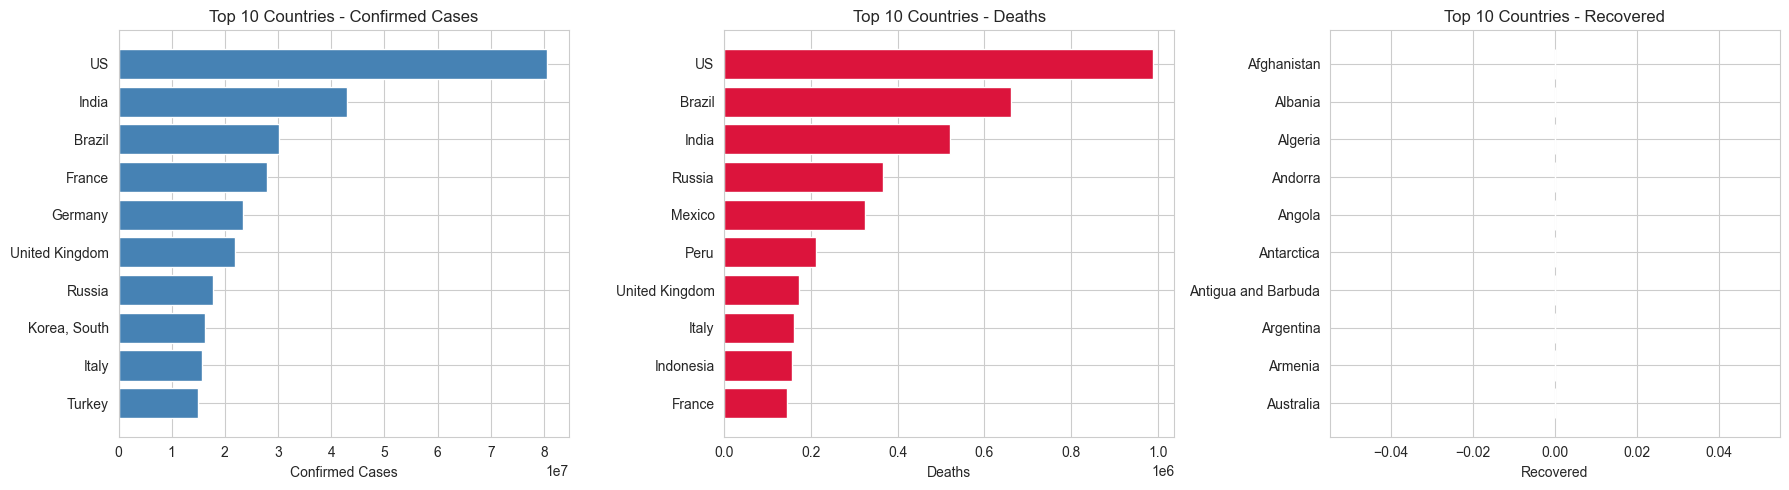

In [13]:
# Cell 6: Top 10 Affected Countries
latest_data_sorted = latest_data.nlargest(10, 'Confirmed')[['Country', 'Confirmed', 'Deaths', 'Recovered']]

print("TOP 10 COUNTRIES BY CONFIRMED CASES")
print("="*70)
print(latest_data_sorted.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Top 10 by Confirmed Cases
top10_confirmed = latest_data.nlargest(10, 'Confirmed')
axes[0].barh(top10_confirmed['Country'], top10_confirmed['Confirmed'], color='steelblue')
axes[0].set_xlabel('Confirmed Cases')
axes[0].set_title('Top 10 Countries - Confirmed Cases')
axes[0].invert_yaxis()

# Top 10 by Deaths
top10_deaths = latest_data.nlargest(10, 'Deaths')
axes[1].barh(top10_deaths['Country'], top10_deaths['Deaths'], color='crimson')
axes[1].set_xlabel('Deaths')
axes[1].set_title('Top 10 Countries - Deaths')
axes[1].invert_yaxis()

# Top 10 by Recovered
top10_recovered = latest_data.nlargest(10, 'Recovered')
axes[2].barh(top10_recovered['Country'], top10_recovered['Recovered'], color='forestgreen')
axes[2].set_xlabel('Recovered')
axes[2].set_title('Top 10 Countries - Recovered')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


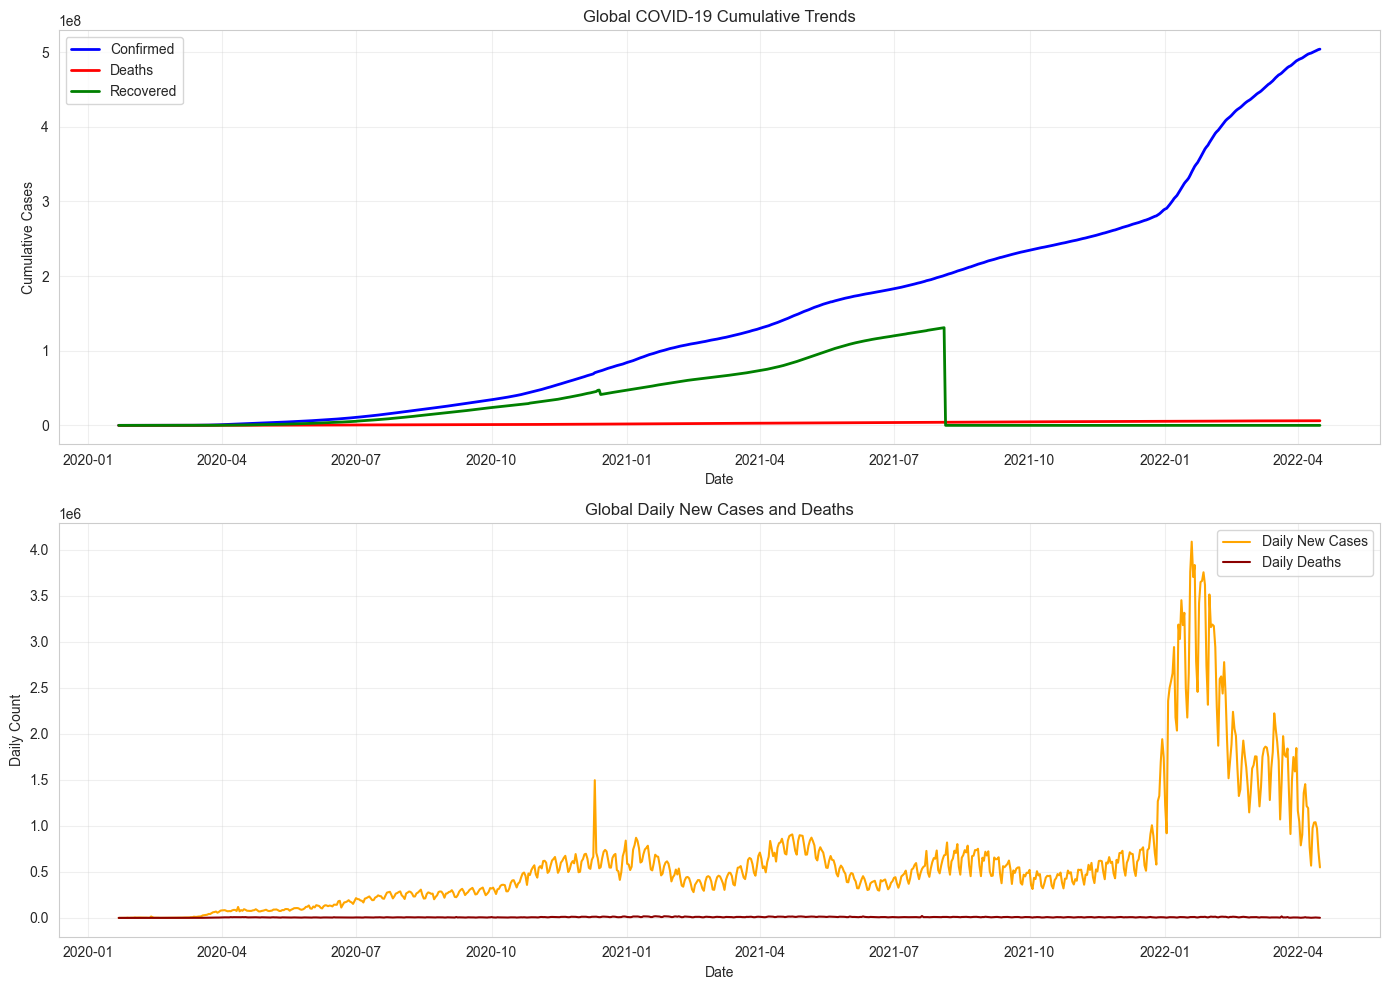

In [14]:
# Cell 7: Global Trends Over Time
# Aggregate global data by date
global_trends = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'New_Confirmed': 'sum',
    'New_Deaths': 'sum'
}).reset_index()

# Plot cumulative cases
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Cumulative trends
axes[0].plot(global_trends['Date'], global_trends['Confirmed'], label='Confirmed', linewidth=2, color='blue')
axes[0].plot(global_trends['Date'], global_trends['Deaths'], label='Deaths', linewidth=2, color='red')
axes[0].plot(global_trends['Date'], global_trends['Recovered'], label='Recovered', linewidth=2, color='green')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cumulative Cases')
axes[0].set_title('Global COVID-19 Cumulative Trends')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Daily new cases
axes[1].plot(global_trends['Date'], global_trends['New_Confirmed'], label='Daily New Cases', linewidth=1.5, color='orange')
axes[1].plot(global_trends['Date'], global_trends['New_Deaths'], label='Daily Deaths', linewidth=1.5, color='darkred')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Count')
axes[1].set_title('Global Daily New Cases and Deaths')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

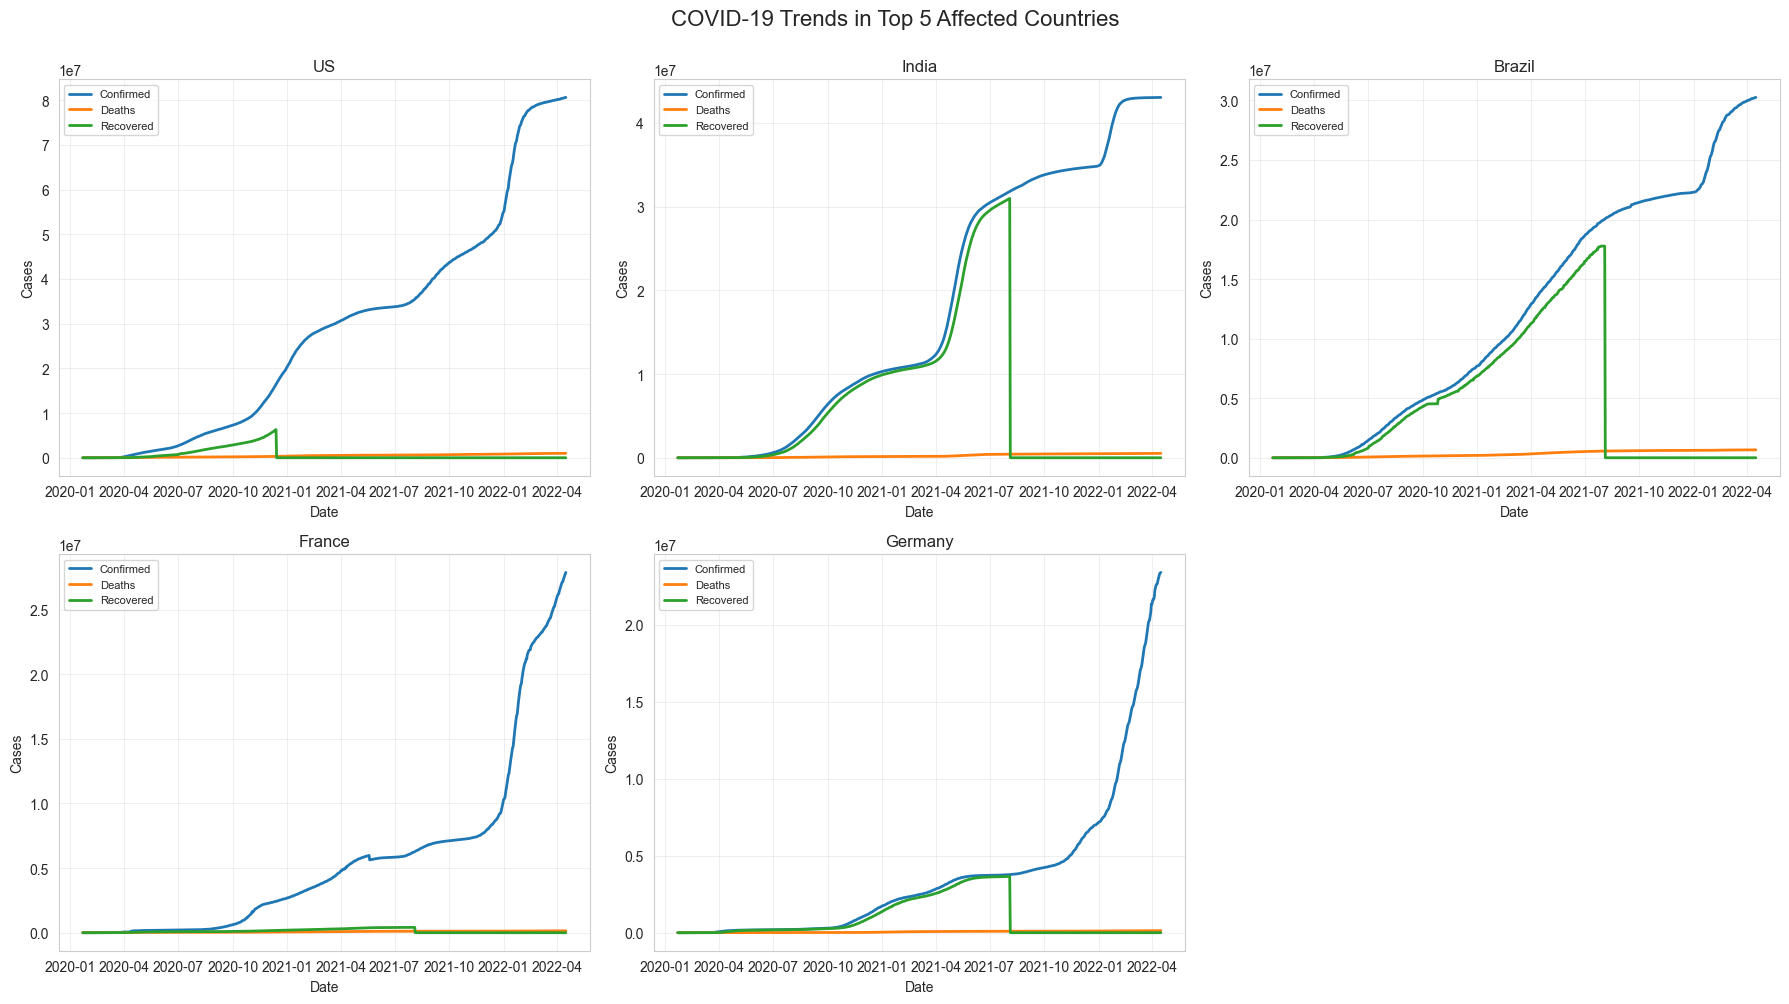

In [15]:
# Cell 8: Country-Specific Analysis (Top 5 Countries)
top5_countries = latest_data.nlargest(5, 'Confirmed')['Country'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, country in enumerate(top5_countries):
    country_data = df[df['Country'] == country].copy()
    
    axes[idx].plot(country_data['Date'], country_data['Confirmed'], label='Confirmed', linewidth=2)
    axes[idx].plot(country_data['Date'], country_data['Deaths'], label='Deaths', linewidth=2)
    axes[idx].plot(country_data['Date'], country_data['Recovered'], label='Recovered', linewidth=2)
    axes[idx].set_title(f'{country}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Cases')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplot
axes[-1].axis('off')

plt.suptitle('COVID-19 Trends in Top 5 Affected Countries', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()


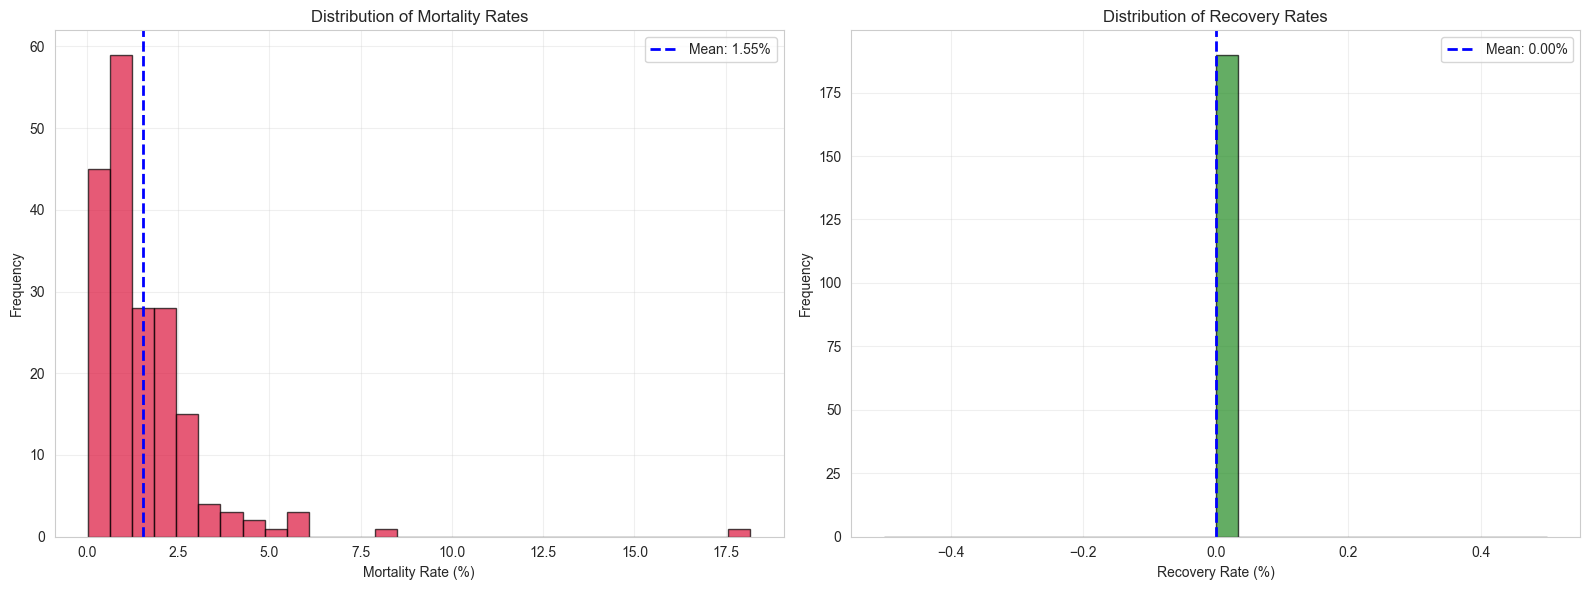


MORTALITY AND RECOVERY RATE STATISTICS
Average Mortality Rate: 1.55%
Median Mortality Rate: 1.19%
Average Recovery Rate: 0.00%
Median Recovery Rate: 0.00%


In [16]:
# Cell 9: Mortality and Recovery Rate Analysis
# Calculate average rates by country (using latest data)
rate_analysis = latest_data[latest_data['Confirmed'] > 1000].copy()  # Filter countries with significant cases

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mortality Rate Distribution
axes[0].hist(rate_analysis['Mortality_Rate'], bins=30, color='crimson', alpha=0.7, edgecolor='black')
axes[0].axvline(rate_analysis['Mortality_Rate'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {rate_analysis["Mortality_Rate"].mean():.2f}%')
axes[0].set_xlabel('Mortality Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Mortality Rates')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Recovery Rate Distribution
axes[1].hist(rate_analysis['Recovery_Rate'], bins=30, color='forestgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(rate_analysis['Recovery_Rate'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {rate_analysis["Recovery_Rate"].mean():.2f}%')
axes[1].set_xlabel('Recovery Rate (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Recovery Rates')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\nMORTALITY AND RECOVERY RATE STATISTICS")
print("="*70)
print(f"Average Mortality Rate: {rate_analysis['Mortality_Rate'].mean():.2f}%")
print(f"Median Mortality Rate: {rate_analysis['Mortality_Rate'].median():.2f}%")
print(f"Average Recovery Rate: {rate_analysis['Recovery_Rate'].mean():.2f}%")
print(f"Median Recovery Rate: {rate_analysis['Recovery_Rate'].median():.2f}%")


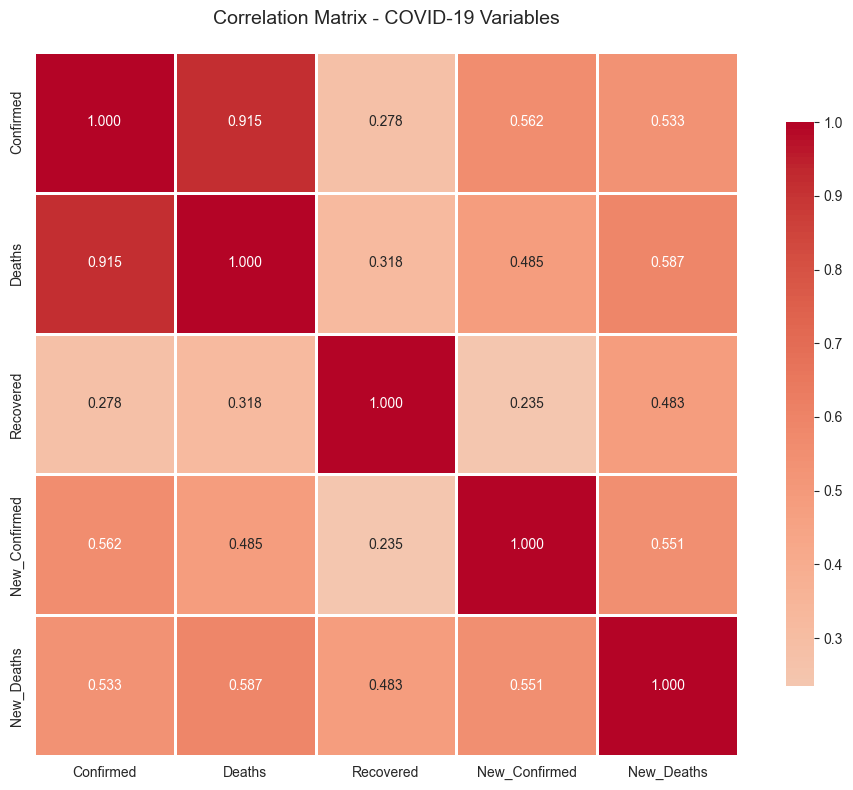


CORRELATION INSIGHTS:
               Confirmed    Deaths  Recovered  New_Confirmed  New_Deaths
Confirmed       1.000000  0.914993   0.277797       0.562070    0.532574
Deaths          0.914993  1.000000   0.318160       0.484783    0.586896
Recovered       0.277797  0.318160   1.000000       0.235340    0.482997
New_Confirmed   0.562070  0.484783   0.235340       1.000000    0.550696
New_Deaths      0.532574  0.586896   0.482997       0.550696    1.000000


In [17]:
# Cell 10: Correlation Analysis
# Create correlation matrix
correlation_cols = ['Confirmed', 'Deaths', 'Recovered', 'New_Confirmed', 'New_Deaths']
correlation_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - COVID-19 Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nCORRELATION INSIGHTS:")
print("="*70)
print(correlation_matrix)

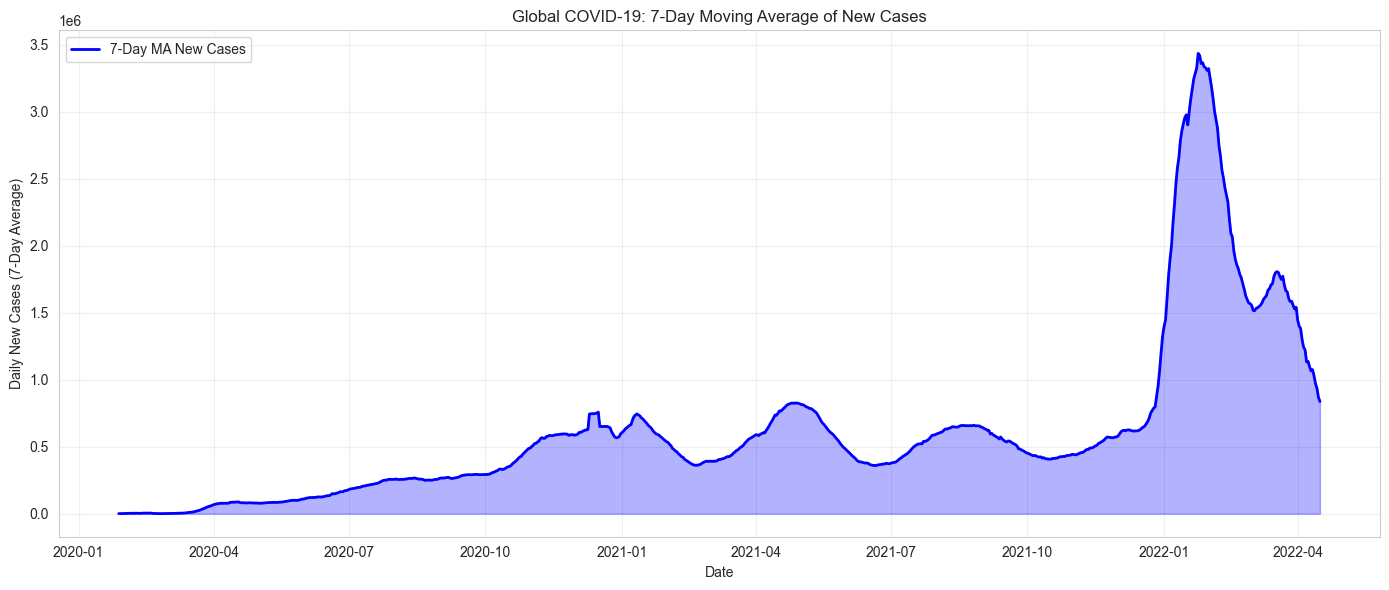

In [18]:
# Cell 11: Time Series Analysis - Growth Rates
# Calculate 7-day moving average for smoothing
global_trends['MA7_Confirmed'] = global_trends['New_Confirmed'].rolling(window=7).mean()
global_trends['MA7_Deaths'] = global_trends['New_Deaths'].rolling(window=7).mean()

# Calculate growth rates
global_trends['Growth_Rate'] = global_trends['Confirmed'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.plot(global_trends['Date'], global_trends['MA7_Confirmed'], label='7-Day MA New Cases', linewidth=2, color='blue')
plt.fill_between(global_trends['Date'], global_trends['MA7_Confirmed'], alpha=0.3, color='blue')
plt.xlabel('Date')
plt.ylabel('Daily New Cases (7-Day Average)')
plt.title('Global COVID-19: 7-Day Moving Average of New Cases')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Cell 12: Summary Insights and Key Findings
print("\n" + "="*70)
print("KEY INSIGHTS AND FINDINGS")
print("="*70)

# 1. Overall statistics
total_confirmed = latest_data['Confirmed'].sum()
total_deaths = latest_data['Deaths'].sum()
total_recovered = latest_data['Recovered'].sum()
global_mortality = (total_deaths / total_confirmed * 100)
global_recovery = (total_recovered / total_confirmed * 100)

print("\n1. GLOBAL OVERVIEW:")
print(f"   • Total Confirmed Cases: {total_confirmed:,.0f}")
print(f"   • Total Deaths: {total_deaths:,.0f}")
print(f"   • Total Recovered: {total_recovered:,.0f}")
print(f"   • Global Mortality Rate: {global_mortality:.2f}%")
print(f"   • Global Recovery Rate: {global_recovery:.2f}%")

# 2. Most affected countries
print("\n2. MOST AFFECTED COUNTRIES:")
top3 = latest_data.nlargest(3, 'Confirmed')
for i, row in enumerate(top3.itertuples(), 1):
    print(f"   {i}. {row.Country}: {row.Confirmed:,.0f} cases")

# 3. Trend analysis
recent_7days = global_trends.tail(7)['New_Confirmed'].mean()
previous_7days = global_trends.tail(14).head(7)['New_Confirmed'].mean()
trend_change = ((recent_7days - previous_7days) / previous_7days * 100)

print("\n3. RECENT TRENDS:")
print(f"   • Average daily new cases (last 7 days): {recent_7days:,.0f}")
print(f"   • Trend compared to previous week: {trend_change:+.2f}%")

# 4. Peak information
peak_daily = global_trends.loc[global_trends['New_Confirmed'].idxmax()]
print("\n4. PEAK STATISTICS:")
print(f"   • Peak daily cases: {peak_daily['New_Confirmed']:,.0f}")
print(f"   • Peak date: {peak_daily['Date'].date()}")

# 5. Data quality
print("\n5. DATA QUALITY:")
print(f"   • Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"   • Number of countries: {df['Country'].nunique()}")
print(f"   • Total records: {len(df):,}")
print(f"   • Missing values: {df.isnull().sum().sum()}")

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)


KEY INSIGHTS AND FINDINGS

1. GLOBAL OVERVIEW:
   • Total Confirmed Cases: 504,155,459
   • Total Deaths: 6,197,159
   • Total Recovered: 0
   • Global Mortality Rate: 1.23%
   • Global Recovery Rate: 0.00%

2. MOST AFFECTED COUNTRIES:
   1. US: 80,625,120 cases
   2. India: 43,042,097 cases
   3. Brazil: 30,250,077 cases

3. RECENT TRENDS:
   • Average daily new cases (last 7 days): 837,667
   • Trend compared to previous week: -23.69%

4. PEAK STATISTICS:
   • Peak daily cases: 4,089,026
   • Peak date: 2022-01-19

5. DATA QUALITY:
   • Date range: 2020-01-22 to 2022-04-16
   • Number of countries: 198
   • Total records: 161,568
   • Missing values: 0

ANALYSIS COMPLETE!
